# Comparing SKADS S3-SEX and T-RECS  SFG $n(z)$

In [1]:
import numpy as np
from astropy.table import Table
from astropy import units

from matplotlib import pyplot as plt
from matplotlib import rc

rc('text', usetex=True)
rc('font', family='serif')
rc('font', size=11)

## Read in T-RECS catalogue

In [2]:
cat_trecs = Table.read('../data/VII_282_sfgsdeep.dat.gz.fits')

In [3]:
z_trecs = cat_trecs['z']
flux_trecs = cat_trecs['I1000'].to(units.Jy)
size_trecs = cat_trecs['Size']

Convert T-RECS size from an Exponential profile scale radius to a Gaussian FWHM, for comparison to SKADS. [See Bonaldi et al 2019](https://arxiv.org/abs/1805.05222) eq. 14.

In [4]:
size_trecs = size_trecs / 0.7

## Read in SKADS catalogue

In [5]:
z_skads, flux_skads, size_skads = np.loadtxt('../data/skads_redshift_flux_dim.txt', unpack=True)
flux_skads = 10.**flux_skads * units.Jy
size_skads = size_skads * units.arcsec

Rescale SKADS size to better match more recent data, as argued for in [Bonaldi & Harrison et al (2016)](https://arxiv.org/abs/1601.03948) Figure 2.

In [6]:
size_skads = size_skads / 2.5

## Compare size distributions

For the Biggs & Ivison ($> 22 \, \mu$Jy) flux cut as in Bonaldi & Harrison et al (2016) Figure 2 panel 4.

In [7]:
size_trecs_22 = size_trecs[flux_trecs > 22.e-6 * units.Jy]
size_skads_22 = size_skads[flux_skads > 22.e-6 * units.Jy]

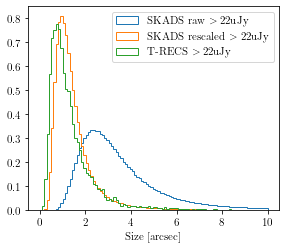

In [8]:

plt.figure(1, figsize=(4.5, 3.75))
plt.hist(size_skads_22.value * 2.5, histtype='step', bins=np.linspace(0,10,100), density=True, label=r'SKADS raw $>22$uJy')
plt.hist(size_skads_22.value, histtype='step', bins=np.linspace(0,10,100), density=True, label=r'SKADS rescaled $>22$uJy')
plt.hist(size_trecs_22, histtype='step', bins=np.linspace(0, 10, 100), density=True, label=r'T-RECS $>22$uJy')
plt.xlabel('Size [arcsec]')
plt.legend()
plt.s;

## Create SKA1 (SKAO Phase 1) and SKA2 (Full SKAO) cuts

For Bonaldi & Harrison et al (2016) we used sensitivity curves of SKA1-MID to simulate different possible observations. The table below shows the selection of sensitivities we ran simulations of (note this table is not public in the paper).

| PSF [arcsec] | $\nu$ [GHz]  | $S_{\rm rms}$ [muJy] |
| ------------ | --------  | ------------ |
| 1.166e+00    | 7.500e-01 | 3.009e+00   |
| 1.166e+00    | 7.500e-01 | 3.009e+00   |
| 2.718e+00    | 7.500e-01 | 3.071e+00   |
| 8.056e-01    | 8.874e-01 | 3.778e+00   |
| 1.000e+00    | 8.874e-01 | 3.246e+00   |
| 2.718e+00    | 8.874e-01 | 3.293e+00   |
| 5.564e-01    | 1.050e+00 | 2.928e+00   |
| 1.000e+00    | 1.050e+00 | 1.980e+00   |
| 2.718e+00    | 1.050e+00 | 2.022e+00   |
| 6.934e-01    | 9.500e-01 | 2.580e+00   |
| 1.000e+00    | 9.500e-01 | 2.007e+00   |
| 2.718e+00    | 9.500e-01 | 2.062e+00   |
| 4.196e-01    | 1.194e+00 | 3.535e+00   |
| 1.000e+00    | 1.194e+00 | 2.084e+00   |
| 2.718e+00    | 1.194e+00 | 2.060e+00   |
| 3.679e-01    | 1.500e+00 | 3.518e+00   |
| 1.000e+00    | 1.500e+00 | 2.347e+00   |
| 2.718e+00    | 1.500e+00 | 2.156e+00   |

Here we take the row with:<br>
PSF: 0.556 arcsec<br>
$\nu$: 1050 GHz<br>
$S_{\rm rms}$: 2.93 muJy

as our SKA1 configuration, and divide the sensitivity by 10 to approximate SKA2.

We also assume galaxy number densities of $n_{\rm gal} = 2.7 \,$arcmin$^{-2}$ for SKA1 and 10 for SKA2.

In [9]:
psf_ska1 = 0.556 * units.arcsec
psf_ska2 = 0.556 * units.arcsec
srms_ska1 = 2.93e-6 * units.Jy
srms_ska2 = 2.93e-7 * units.Jy

skads_cut_ska1 = (flux_skads > srms_ska1) * (size_skads > psf_ska1)
skads_cut_ska2 = (flux_skads > srms_ska2) * (size_skads > psf_ska2)

trecs_cut_ska1 = (flux_trecs > srms_ska1) * (size_trecs > psf_ska1)
trecs_cut_ska2 = (flux_trecs > srms_ska2) * (size_trecs > psf_ska2)

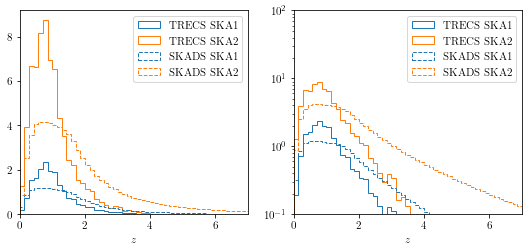

In [10]:
plt.figure(2, figsize=(2 * 4.5, 3.75))
plt.subplot(121)
counts, bins = np.histogram(z_trecs[trecs_cut_ska1], bins=np.linspace(0, 7, 50), density=True)
plt.hist(bins[:-1], bins, weights=counts*2.7, histtype='step', label='TRECS SKA1', color='C0', linestyle='solid')
counts, bins = np.histogram(z_trecs[trecs_cut_ska2], bins=np.linspace(0, 7, 50), density=True)
plt.hist(bins[:-1], bins, weights=counts*10, histtype='step', label='TRECS SKA2', color='C1', linestyle='solid')

counts, bins = np.histogram(z_skads[skads_cut_ska1], bins=np.linspace(0, 7, 50), density=True)
plt.hist(bins[:-1], bins, weights=counts*2.7, histtype='step', label='SKADS SKA1', color='C0', linestyle='dashed')
counts, bins = np.histogram(z_skads[skads_cut_ska2], bins=np.linspace(0, 7, 50), density=True)
plt.hist(bins[:-1], bins, weights=counts*10, histtype='step', label='SKADS SKA2', color='C1', linestyle='dashed')

plt.legend()
plt.xlim([0,7])
plt.xlabel('$z$')
plt.subplot(122)
counts, bins = np.histogram(z_trecs[trecs_cut_ska1], bins=np.linspace(0, 7, 50), density=True)
plt.hist(bins[:-1], bins, weights=counts*2.7, histtype='step', label='TRECS SKA1', color='C0', linestyle='solid')
counts, bins = np.histogram(z_trecs[trecs_cut_ska2], bins=np.linspace(0, 7, 50), density=True)
plt.hist(bins[:-1], bins, weights=counts*10, histtype='step', label='TRECS SKA2', color='C1', linestyle='solid')

counts, bins = np.histogram(z_skads[skads_cut_ska1], bins=np.linspace(0, 7, 50), density=True)
plt.hist(bins[:-1], bins, weights=counts*2.7, histtype='step', label='SKADS SKA1', color='C0', linestyle='dashed')
counts, bins = np.histogram(z_skads[skads_cut_ska2], bins=np.linspace(0, 7, 50), density=True)
plt.hist(bins[:-1], bins, weights=counts*10, histtype='step', label='SKADS SKA2', color='C1', linestyle='dashed')

plt.legend()
plt.xlim([0,7])
plt.yscale('log')
plt.ylim([1.e-1, 1.e2])
plt.xlabel('$z$')
plt.savefig('../plots/trecs-skads-redshift.png', bbox_inches='tight', dpi=300);